# Загрузка Pandas и очистка данных

### Импорт библиотек и загрузка данных.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\My_Job\Data Scientist_Skill Factory\Folders with data/Unit_3/main_task_new.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


### Функции.

In [3]:
def column_transformation(x):# Функцция убирает из начала элемента столбца символ [.
    x = str(x)
    if x[0] == '[':
        return x[1:]
    else:
        return x

In [4]:
def column_transformation1(x):# Функцция убирает из конца элемента столбца символ ].
    x = str(x)
    if x[len(x)-1] == ']':
        return x[:(len(x)-1)]
    else:
        return x

In [5]:
def date_difference(d):# напишем функцию рассчитывающую разницу между самой ранней и самой поздней датой для датафрейма d.
# В результате этого цикла для каждого элемента df.reviews получаем строковое значение, где отзывы отделены от дат '], ['
    ls = d.reviews.tolist()
    for i in range (0, len(ls)):
        if ls[i][0] == '[':
            ls[i] = ls[i][1:]
        if ls[i][len(ls[i])-1] == ']':
            ls[i] = ls[i][:(len(ls[i])-1)]
    ls_temp = []# Создаем пустой список куда будем записывать правые части (с датами) элементов столбца df.reviews.
    for i in range (0, len(ls)):
        ls_temp.append(ls[i].split('], [')[1])
    # В результате получили список ls_temp каждый элемент которого является строкой, в кодорус с разделителем ', ' записаны
    #от нуля до двух дат.

    ls_dates = []# Создаем пустой список, в который запишем даты, как отдельный элемент списка.
    for i in range (0, len(ls_temp)):
        if len(ls_temp[i]) == 26:
            ls_temp[i].split(', ')
            ls_dates.append(ls_temp[i])
        elif len(ls_temp[i]) == 12:
            ls_dates.append(ls_temp[i])
        else:
            ls_temp[i] = ls_temp[i]
        
    ls_dates_final = []# Создаем пустой список, в который запишем каждую дату, как отдельный элемент списка.
    for i in range (0, len(ls_dates)):
        if len(ls_dates[i]) == 26:
            ls_dates_final.append(ls_dates[i].split(', ')[0])
            ls_dates_final.append(ls_dates[i].split(', ')[1])
        else:
            ls_dates_final.append(ls_dates[i])



    for i in range (0, len(ls_dates_final)):# Убираем апострофы.
        ls_dates_final[i] = ls_dates_final[i][1:]
        ls_dates_final[i] = ls_dates_final[i][:-1]
    
    ls_dates_dt = []# Создаем пустой список куда запишем все даты в формате datatime.
    for i in range (0, len(ls_dates_final)):
        ls_dates_dt.append(datetime.strptime(ls_dates_final[i], '%m/%d/%Y'))
    
    if len(ls_dates_dt) != 0:
        difference = max(ls_dates_dt)-min(ls_dates_dt)
        return difference.days
    else:
        difference = 0
        return difference
    

In [6]:
def standartization(x): # Функция выполняет стандартизацию столбца.
    df['Center'] = 0.0
    df['Mean'] = x.mean()
        
    for i in range (0, len(x)):
        df.Center = x - df.Mean
        
    Norm = np.linalg.norm(df.Center)
    
    df['Standart'] = 0.0
    df.Standart = df.Center/Norm
        
    del df['Center']
    del df['Mean']

In [7]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='Rating', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:31])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [8]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:31]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'Rating'], 
                        df.loc[df.loc[:, column] == comb[1], 'Rating']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

### Код по очистке данных и генерации новых признаков

In [9]:
# Переименуем столбцы таким образом, чтобы с ними дальше можно было работать.
df.columns = ['Restaurant_id', 'city', 'cuisine_style', 'ranking', 'Rating', 'price_range', 'number_of_reviews', 'reviews', 'url_ta', 'id_ta']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   city               40000 non-null  object 
 2   cuisine_style      30717 non-null  object 
 3   ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   price_range        26114 non-null  object 
 6   number_of_reviews  37457 non-null  float64
 7   reviews            40000 non-null  object 
 8   url_ta             40000 non-null  object 
 9   id_ta              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


### Выполним разведывательный анализ данных.

    В датафрейме df у нас 10 столбцов и 40000 строк. Рассмотрим каждый из столбцов по отдельности, выявим наличие или отсутствие пропусков, в случае если они есть - оценим возможность их заполнения. Постараемся определить степень влияния тех или иных данных на целевую переменную Rating, чтобы решить какие данные стоит брать в работу, а какие нет. Подумаем, какие признаки можно сгенерировать.

##### Столбец Restaurant_id

In [10]:
df.Restaurant_id.isna().value_counts()

False    40000
Name: Restaurant_id, dtype: int64

In [11]:
print(df.Restaurant_id.nunique())

11909


    Видим, что у нас нет пропущенных значений, все 40000 строк заполнены. При этом количество уникальных значений - 11909. То есть это id не отдельного ресторана, а сети. Пока оставим этот столбец, вдруг потребуется группировать по сетям. 

##### Столбец city.

In [12]:
df.city.isna().value_counts()

False    40000
Name: city, dtype: int64

In [13]:
display(df.city.value_counts())
display(len(df.city.value_counts()))

London        5757
Paris         4897
Madrid        3108
Barcelona     2734
Berlin        2155
Milan         2133
Rome          2078
Prague        1443
Lisbon        1300
Vienna        1166
Amsterdam     1086
Brussels      1060
Hamburg        949
Munich         893
Lyon           892
Stockholm      820
Budapest       816
Warsaw         727
Dublin         673
Copenhagen     659
Athens         628
Edinburgh      596
Zurich         538
Oporto         513
Geneva         481
Krakow         443
Oslo           385
Helsinki       376
Bratislava     301
Luxembourg     210
Ljubljana      183
Name: city, dtype: int64

31

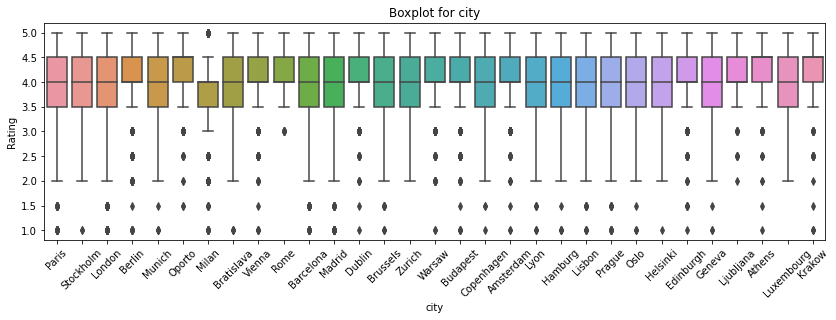

In [14]:
for col in ['city']:
    get_boxplot(col)

Проверим, есть ли статистическая разница в распределении рейтинга по городам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения рейтинга по различным городам неразличимы:

In [15]:
for col in ['city']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки city


    У нас в столбце city нет пропущенных значений, для каждого ресторана указан город, где он находится. Всего в датасете 31 город, при этом в городе с наименьшим числом ресторанов - Любляне их 183. Для городов найдены статистически значимые различия, поэтому мы берем этот столбец в работу. Целесообразно выразить город, где находиться ресторан через dummy переменные.
    Так же на рейтинг ресторана может существенное влияние оказать население города где он находиться (ведь это потенциальное количество посетителей и тех кто пишет о ресторане отзывы), общее количество ресторанов в городе и количество жителей на один ресторан. Введем эти признаки.

In [16]:
df['Population'] = df.city# Создаем столбец Population равный столбцу df.city
# Создадим словарь population_dict куда запишем цифры, соответствующие населению городов:
population_dict = {"Population": {'London': 8908081, 'Paris': 2148327, 'Madrid': 3334730, 'Barcelona': 1664182, 'Berlin': 3644826, 'Milan': 1336180, 'Rome': 2870500, 'Prague': 1335084, 'Lisbon': 506654, 'Vienna': 1991191, 'Amsterdam': 860124, 'Brussels': 185103, 'Hamburg': 1845229, 'Munich': 1471508, 'Lyon': 518635, 'Stockholm': 961609, 'Budapest': 1752268, 'Warsaw': 1790658, 'Dublin': 1173179, 'Copenhagen': 794128, 'Athens': 664046, 'Edinburgh': 488050, 'Zurich': 434008, 'Oporto': 215945, 'Geneva': 201818, 'Krakow': 779115, 'Oslo': 693494, 'Helsinki': 655281, 'Bratislava': 437725, 'Luxembourg': 124509, 'Ljubljana': 286745}}# Создали словарь
df = df.replace(population_dict)# Заменили в столбце Population  категориальные значения числовыми.
# Таким образом получили столбец, каждым элементом которого является население города, где находится ресторан.
# Данные о населении городов взял из википедии.

In [17]:
df['Number_of_restaurants'] = df.city# Создаем столбец Number_of_restaurants равный столбцу df.city
# Создадим словарь number_of_restaurants_dict куда запишем цифры, соответствующие количеству ресторанов в каждом городе:
number_of_restaurants_dict = {"Number_of_restaurants": {'London': 5757, 'Paris': 4897, 'Madrid': 3088, 'Barcelona': 2734, 'Berlin': 2155, 'Milan': 2133, 'Rome': 2078, 'Prague': 1443, 'Lisbon': 1300, 'Vienna': 1166, 'Amsterdam': 1086, 'Brussels': 1060, 'Hamburg': 949, 'Munich': 893, 'Lyon': 892, 'Stockholm': 820, 'Budapest': 816, 'Warsaw': 727, 'Dublin': 673, 'Copenhagen': 659, 'Athens': 628, 'Edinburgh': 596, 'Zurich': 538, 'Oporto': 513, 'Geneva': 481, 'Krakow': 443, 'Oslo': 385, 'Helsinki': 376, 'Bratislava': 301, 'Luxembourg': 210, 'Ljubljana': 183}}# Создали словарь
df = df.replace(number_of_restaurants_dict)# Заменили в столбце Number_of_restaurants  категориальные значения числовыми.
# Таким образом получили столбец, каждым элементом которого является количество ресторанов в городе, где находится ресторан.
# Данные о количестве ресторанов взял из нашего датасета.

In [18]:
df['Residents_per_restaurant'] = 0.0# Создаем столбец Residents_per_restaurant заполненный нулями.
for i in range (0, (len(df.Residents_per_restaurant))):
    df.Residents_per_restaurant[i] = df.Population[i]/df.Number_of_restaurants[i]
# В результате получаем столбец, каждый элемент которого заполнен значением количества жителей на один
# ресторан в городе, где находиться ресторан.

<ipython-input-18-a3796fcd3545>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Residents_per_restaurant[i] = df.Population[i]/df.Number_of_restaurants[i]


In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

Было бы хорошо найти данные для городов из датасета о количестве посетивших их туристов в течении 2019-го года (последний год до COVID-19). Или более раннего. И так же рассчитать количество туристов на один ресторан. Но к сожалению надежных данных я не нашел. 

##### Столбец cuisine_style

In [19]:
df.cuisine_style.isna().value_counts()

False    30717
True      9283
Name: cuisine_style, dtype: int64

In [20]:
# Уберем из столбца df.cuisine_style символы "[" и "]"
df['cuisine_style'] = df.cuisine_style.apply(column_transformation)
df['cuisine_style'] = df.cuisine_style.apply(column_transformation1)

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

In [21]:
# Преобразуем каждый элемент столбца df.cuisine_style из строки в список, используя ', ' в качестве разделителя.
df.cuisine_style = df['cuisine_style'].apply(lambda x: x.split(', '))

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

In [22]:
#Сколько типов кухонь представлено в наборе данных?

ls_cuisine_styles = []#Создаем пустой список.
#Циклом перебираем элементы столбца df.cuisine_style (списки), а вложенным списком - элементы элеменнтов столбца (списков)
# и каждый добавляем в изначально пустой список ls_cuisine_styles.
for i in range (0, len(df)):
    for j in range (0, len(df.cuisine_style[i])):
        ls_cuisine_styles.append(df.cuisine_style[i][j])
ls_cuisine_styles#(получаем список кухонь (не уникальных значений а именно с повторами) включающий 'nan')
ls_cuisine_style_unique = list(set(ls_cuisine_styles))#получаем список уникальный значений кухонь включая 'nan'
ls_cuisine_style_unique.pop(26)# убираем 'nan'
display(len(ls_cuisine_style_unique))# Получаем количество кухонь в датафрейме
print(ls_cuisine_style_unique)

125

["'Tibetan'", "'Spanish'", "'Turkish'", "'American'", "'Argentinean'", "'Chilean'", "'Bar'", "'Dutch'", "'Minority Chinese'", "'Afghani'", "'Gluten Free Options'", "'Mexican'", "'Canadian'", "'Colombian'", "'Pakistani'", "'Barbecue'", "'Central European'", "'Chinese'", "'Mongolian'", "'Caribbean'", "'Slovenian'", "'Georgian'", "'Vietnamese'", "'Steakhouse'", "'Taiwanese'", "'Cafe'", "'Ethiopian'", "'Belgian'", "'Malaysian'", "'Diner'", "'International'", "'Fusion'", "'Central American'", "'Welsh'", "'Jamaican'", "'Seafood'", "'Cajun & Creole'", "'Armenian'", "'Italian'", "'Balti'", "'European'", "'Central Asian'", "'African'", "'Czech'", "'Street Food'", "'Ukrainian'", "'Sri Lankan'", "'Brew Pub'", "'Fujian'", "'Kosher'", "'Thai'", "'Grill'", "'Venezuelan'", "'Swiss'", "'Peruvian'", "'Nepali'", "'Yunnan'", "'Moroccan'", "'Sushi'", "'Latin'", "'Portuguese'", "'Eastern European'", "'Brazilian'", "'Israeli'", 'nan', "'Swedish'", "'Bangladeshi'", "'Burmese'", "'Arabic'", "'Pizza'", "'Gastr

In [23]:
df_ls_cuisine_styles = pd.DataFrame(ls_cuisine_styles)
df_ls_cuisine_styles.value_counts().index[0]

("'Vegetarian Friendly'",)

Предполагаем что наличие или отсутствие самой распространенной кухни Vegetarian Friendly влияет на рейтинг ресторана. Добавим в датафрейм столбец Vegetarian_Friendly. Заполним его значениями 1 (если эта кухня представлена в ресторане) и 0 (если эта кухня не представлена в ресторане)

In [24]:
df['Vegetarian_Friendly'] = df.cuisine_style# Создаем столбец Vegetarian_Friendly равный столбцу cuisine_style
df.Vegetarian_Friendly = df.Vegetarian_Friendly.apply(lambda x: str("'Vegetarian Friendly'" in x))# Возвращает True/False
# Создадим словарь vegetarian_friendly_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
vegetarian_friendly_dict = {"Vegetarian_Friendly": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(vegetarian_friendly_dict)# Заменили в столбце Vegetarian_Friendly категориальные значения числовыми.

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

In [25]:
# Какое среднее количество кухонь предлагается в одном ресторане?
# Если в данных отсутствует информация о типах кухонь, то считайте, что в этом ресторане предлагается только один тип кухни.

ls_cuisine_styles_1 = []#Создаем пустой список.
#Циклом перебираем элементы столбца df.cuisine_style (списки) и длину каждого добавляем в изначально пустой список 
#ls_cuisine_styles_1. В случае если в столбце пустое значение, то добавляем 1. В итоге получим список, количества кухонь.
for i in range (0, len(df)):
    if df.cuisine_style[i] == 'nan':
        ls_cuisine_styles_1.append(1)
    else:
        ls_cuisine_styles_1.append(len(df.cuisine_style[i]))
        
sum(ls_cuisine_styles_1)/len(ls_cuisine_styles_1)

2.6224

    Видим, что в столбце cuisine_style 9283 пропущенных значения. Остальные значения представляют из себя строки, где внутри квадратных скобок через запятую перечислены типы кухонь, представленные в ресторане. Убрав квадратные скобки и преобразовав строку в список (используя запятую в качестве разделителя), мы получили каждый тип кухни как отдельный элемент списка. После этого мы посчитали общее количество кухонь, представленное в ресторанах - 125. После чего, сделав допущение что в случае пропущенных значений в ресторане есть только один тип кухни, мы подсчитали среднее количество типов кухонь в ресторане для всего датафрейма - 2.6224. Так же определили наиболее популярную кухню, представленную в наибольшем количестве ресторанов - Vegetarian Friendly.
    На основе этих данных мы сгенерировали новый признак - наличие кухни Vegetarian Friendly в ресторане. Так как чаще всего встречается Vegetarian Friendly, то посчитали тип кухни оказывающим наибольшее влияние на целевую переменную. Мы сгенерировали столбец Vegetarian_Friendly в котором при наличии в ресторане этой кухни получили значение 1, а при ее отсутствии 0.
    Так же можно сгенерировать столбец количества кухонь представленных в ресторане. Сгенерируем его прямо сейчас, до выполнения корреляционного анализа, чтобы этот числовой признак был учтен.

In [26]:
df['cuisine_style_quantity'] = df.cuisine_style# Создаем столбец cuisine_style_quantity равный столбцу cuisine_style
# В столбце cuisine_style_quantity заменяем каждый элемент на значение его длины (количество кухонь)
df.cuisine_style_quantity = df.cuisine_style_quantity.apply(lambda x: len(x))

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

Так же мы можем сгенерировать еще один важный признак - представлена ли в ресторане местная кухня (местная для города где он находится). Как горожане обычно любят свою еду, так и туристы стремятся попробовать. Сгенерируем этот признак прямо сейчас.

In [27]:
df['Local_cuisine'] = df.city # Создаем столбец Local_cuisine равный столбцу city.
local_cuisine_dict = {"Local_cuisine": {'London': "'Pub'", 'Paris': "'French'", 'Madrid': "'Spanish'", 'Barcelona': "'Spanish'", 'Berlin': "'German'", 'Milan': "'Italian'", 'Rome': "'Italian'", 'Prague': "'Czech'", 'Lisbon': "'Portuguese'", 'Vienna': "'Austrian'", 'Amsterdam': "'Dutch'", 'Brussels': "'Belgian'", 'Hamburg': "'German'", 'Munich': "'German'", 'Lyon': "'French'", 'Stockholm': "'Swedish'", 'Budapest': "'Hungarian'", 'Warsaw': "'Polish'", 'Dublin': "'Irish'", 'Copenhagen': "'Danish'", 'Athens': "'Greek'", 'Edinburgh': "'Scottish'", 'Zurich': "'German'", 'Oporto': "'Portuguese'", 'Geneva': "'Swiss'", 'Krakow': "'Polish'", 'Oslo': "'Norwegian'", 'Helsinki': "'Scandinavian'", 'Bratislava': "'Eastern European'", 'Luxembourg': "'Belgian'", 'Ljubljana': "'Slovenian'"}}# Создали словарь
# В словаре есть допущения. Для Лондона я местной кухней назначил 'Pub', для Хельсинки 'Scandinavian', для Братиславы
# 'Eastern European', для Люксембурга 'Belgian'. Все остальные - национальные кухни страны, где находиться ресторан.
df = df.replace(local_cuisine_dict)# Заменили в столбце Local_cuisine названия городов соответствующими городам типами кухни.

for i in range (0, len(df.Local_cuisine)):
    if str(df.cuisine_style[i]) == "['nan']":
        df.Local_cuisine[i] == 'No_information_about_local_cuisine'
    else:
        if df.Local_cuisine[i] in df.cuisine_style[i]:
            df.Local_cuisine[i] = 'Local_cuisine_presented'
        else:
            df.Local_cuisine[i] = 'Local_cuisine_is_not_presented'

for i in range (0, len(df.Local_cuisine)):
    if df.Local_cuisine[i] == 'Local_cuisine_presented':
        df.Local_cuisine[i] = df.Local_cuisine[i]
    elif df.Local_cuisine[i] == 'Local_cuisine_is_not_presented':
        df.Local_cuisine[i] = df.Local_cuisine[i]
    else:
        df.Local_cuisine[i] = 'No_information_about_local_cuisine'

    

# В результате получили столбец df.Local_cuisine в котором в строковом значении написано, представлена в ресторане
# местная кухня, не представлена или нет информации. Записали строками, а не цифровыми кодами потому что цифровой код не 
# свести к 1 и 0, здесь 3 значения а не два. Ниже преобразуем столбец в dummy-переменные.

<ipython-input-27-259d15c17d25>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Local_cuisine[i] = 'Local_cuisine_presented'
<ipython-input-27-259d15c17d25>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Local_cuisine[i] = 'Local_cuisine_is_not_presented'
<ipython-input-27-259d15c17d25>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Local_cuisine[i] = df.Local_cuisine[i]
<ipython-input-27-259d15c17d25>:22: SettingWithC

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

In [28]:
dummies_local_cuisine  = pd.get_dummies(df.Local_cuisine)

In [ ]:
dummies_local_cuisine# Если хотим видеть временную таблицу dummies_local_cuisine , жмем этот блок.

In [29]:
# "склеим" датафрейм dummies_local_cuisine с датафреймом df
df = pd.concat([df, dummies_local_cuisine], axis = 1)
del df['Local_cuisine']

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

##### Столбец ranking.

In [30]:
df.ranking.isna().value_counts()

False    40000
Name: ranking, dtype: int64

count    40000.000000
mean      3676.028525
std       3708.749567
min          1.000000
25%        973.000000
50%       2285.000000
75%       5260.000000
max      16444.000000
Name: ranking, dtype: float64

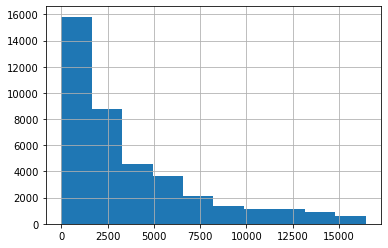

In [31]:
# Этот столбец числовой и без пропусков. Поэтому посмотрим на его распределение:
df.ranking.hist()
df.ranking.describe()

    Выбросов нет. 75 процентов ресторанов имеет ranking менее 5260. Это объясняется как качеством этих ресторанов, так и тем что часть из них расположена в городах, где количество ресторанов не так велико, чтобы была возможность высокого raking. Напомню, что raking это место, которое занимает данный ресторан среди всех ресторанов своего города.

##### Столбец price_range.

In [32]:
df.price_range.isna().value_counts()

False    26114
True     13886
Name: price_range, dtype: int64

In [33]:
df.price_range.value_counts()

$$ - $$$    18412
$            6279
$$$$         1423
Name: price_range, dtype: int64

    В столбце price_range пропущено 13886 значений. Так же видно, что есть всего три ценовых категории. Дорогие - $$$$, средние - $$ - $$$ (их больше всего) и дешевые - $. Целесообразно считать рестораны где ценовая категория не указана ресторанами средней ценовой категории.

In [34]:
# Заполним в столбце price_range пропуски средним ценовым значением '$$ - $$$'
df['price_range'].fillna('$$ - $$$', inplace = True)


##### Столбец number_of_reviews.

In [35]:
df.number_of_reviews.isna().value_counts()

False    37457
True      2543
Name: number_of_reviews, dtype: int64

count    37457.000000
mean       124.825480
std        295.666352
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: number_of_reviews, dtype: float64

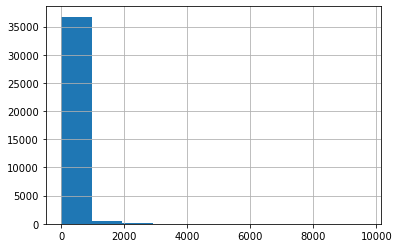

In [36]:
# Этот столбец числовой. Посмотрим на его распределение:
df.number_of_reviews.hist()
df.number_of_reviews.describe()

 Здесь очевидно неравномерное распределение. Изучим вопрос подробнее. 

count    33109.000000
mean        51.887855
std         62.359089
min          2.000000
25%          8.000000
50%         25.000000
75%         73.000000
max        274.000000
Name: number_of_reviews, dtype: float64

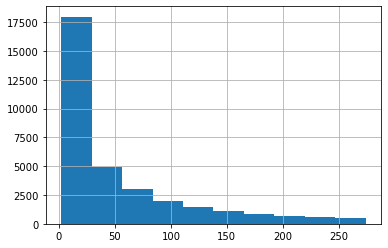

In [37]:
top_limit = 0.75
low_limit = 0.25
IQR = df.number_of_reviews.quantile(top_limit) - df.number_of_reviews.quantile(low_limit)
perc_low = df.number_of_reviews.quantile(low_limit)
perc_high = df.number_of_reviews.quantile(top_limit)
#print('Нижний перцентиль: {},'.format(perc_low), 'Верхний перцентиль: {},'.format(perc_high), "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=perc_low - 1.5*IQR, l=perc_high + 1.5*IQR))
 
df.number_of_reviews.loc[df.number_of_reviews.between(perc_low - 1.5*IQR, perc_high + 1.5*IQR)].hist()
df.number_of_reviews.loc[df.number_of_reviews.between(perc_low - 1.5*IQR, perc_high + 1.5*IQR)].describe() 


С помощью метода квартилей мы исключили из распределения рестораны со слишком большим количеством отзывов. Вероятно эти рестораны широко известны, хорошо разрекламированы и поэтому многие считают своим долгом написать отзыв о своем визите туда. Их не очень много, а количество отзывов многократно превосходит таковое у ббольшинства ресторанов. Поэтому было бы разумно заполнять пропущенные значения не средним арифметическим по всем ресторанам, а медианным значением тех ресторанов, что остались в распределении после того, как мы убрали рестораны со слишком высокими значениями (даже это "обрезанное" распределение неравномерное, поэтому используем медианное значение, а не среднее).

In [38]:
# Будем считать, что если количество отзывов не указано, то оно равно медианному числу от оставшихся в "обрезанном" распре-
# делении ресторанов.
# Заполним пропуски этими значениями.
number_of_reviews_median = df.number_of_reviews.loc[df.number_of_reviews.between(perc_low - 1.5*IQR, perc_high + 1.5*IQR)].median()
df.number_of_reviews = df['number_of_reviews'].fillna(number_of_reviews_median)
number_of_reviews_median# Выведем медианное значение в "обрезанном" распределении.

25.0

##### Столбец reviews.

In [39]:
df.reviews.tolist()

["[['Good food at your doorstep', 'A good hotel restaurant'], ['12/31/2017', '11/20/2017']]",
 "[['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']]",
 "[['Catch up with friends', 'Not exceptional'], ['01/08/2018', '01/06/2018']]",
 '[[], []]',
 "[['Best place to try a Bavarian food', 'Nice building but improvements need to be...'], ['11/18/2017', '02/19/2017']]",
 "[['There are better 3 star hotel bars', 'Amazing views, friendly service and good q...'], ['09/16/2017', '05/31/2017']]",
 "[['Excellent simple local eatery.', 'Excellent Restaurant'], ['08/04/2017', '11/05/2017']]",
 "[['Wasting of money', 'excellent cuisine'], ['02/16/2014', '06/13/2012']]",
 '[[], []]',
 "[['Clean efficient staff', 'Nice little pizza takeaway place'], ['11/07/2017', '03/27/2017']]",
 '[[], []]',
 "[['Not bad for Canary Wharf', 'To be a pilgrim'], ['12/15/2017', '11/22/2017']]",
 "[['Great service, good za', 'Lovely, relaxed atmosphere!'], ['01/07/2018', '12/27/2017']]",
 "[['What

Видно, что столбец df.reviews заполнен строками, которые в левой части содержат отзывы, а в правой, после разделителя,  даты их написания.Нам могут быть интересны именно даты. Поработаем с ними.

In [40]:
for i in range (0, len(df.reviews)):
    if df.reviews[i][0] == '[':
        df.reviews[i] = df.reviews[i][1:]
    if df.reviews[i][len(df.reviews[i])-1] == ']':
        df.reviews[i] = df.reviews[i][:(len(df.reviews[i])-1)]
df.reviews[1]
# В результате этого цикла для каждого элемента df.reviews получаем строковое значение, где отзывы отделены от дат '], ['

<ipython-input-40-84c3b85f1c12>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.reviews[i] = df.reviews[i][1:]
<ipython-input-40-84c3b85f1c12>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.reviews[i] = df.reviews[i][:(len(df.reviews[i])-1)]


"['Unique cuisine', 'Delicious Nepalese food'], ['07/06/2017', '06/19/2016']"

Найдем дату самого свежего отзыва.

In [41]:
ls = df.reviews.tolist()
ls_temp = []# Создаем пустой список куда будем записывать правые части (с датами) элементов столбца df.reviews.
for i in range (0, len(ls)):
    ls_temp.append(ls[i].split('], [')[1][:-1])
    # В результате получили список ls_temp каждый элемент которого является строкой, в кодорус с разделителем ', ' записаны
    #от нуля до двух дат.

ls_dates = []# Создаем пустой список, в который запишем даты, как отдельный элемент списка.
for i in range (0, len(ls_temp)):
    if len(ls_temp[i]) == 26:
        ls_temp[i].split(', ')
        ls_dates.append(ls_temp[i])
    elif len(ls_temp[i]) == 12:
        ls_dates.append(ls_temp[i])
    else:
        ls_temp[i] = ls_temp[i]
        
ls_dates_final = []# Создаем пустой список, в который запишем каждую дату, как отдельный элемент списка.
for i in range (0, len(ls_dates)):
    if len(ls_dates[i]) == 26:
        ls_dates_final.append(ls_dates[i].split(', ')[0])
        ls_dates_final.append(ls_dates[i].split(', ')[1])
    else:
        ls_dates_final.append(ls_dates[i])

for i in range (0, len(ls_dates_final)):# Убираем апострофы. # Получили полный список всех дат когда были оставлены отзывы.
    ls_dates_final[i] = ls_dates_final[i][1:]
    ls_dates_final[i] = ls_dates_final[i][:-1]
    
ls_dates_dt = []# Создаем пустой список куда запишем все даты в формате datatime.
for i in range (0, len(ls_dates_final)):
    ls_dates_dt.append(datetime.strptime(ls_dates_final[i], '%m/%d/%Y'))

ls_dates = []# Создаем пустой список куда запишем все даты в формате удобном для работы.
for i in range (0, len(ls_dates_dt)):
    ls_dates.append(ls_dates_dt[i].strftime('%Y%m%d'))

# Найдем самую позднюю дату (максимальный элемент списка)
display(max(ls_dates))

'20180226'

In [42]:
# Какое максимальное количество дней отделяет даты публикации отзывов? 
# Введите количество дней в виде целого числа.
date_difference(df)

5059

In [43]:
# Какое количество дней отделяет даты публикации отзывов на сайте ресторана? 
# Введите количество дней в виде целого числа.
ls_dates_diff = []
for i in range (0, len(ls_temp)):
    if len(ls_temp[i]) == 26:
        ls_temp[i].split(', ')
        early_date = datetime.strptime(ls_temp[i].split(', ')[0][1:-1], '%m/%d/%Y')
        late_date = datetime.strptime(ls_temp[i].split(', ')[1][1:-1], '%m/%d/%Y')
        diff = late_date - early_date
        ls_dates_diff.append(diff.days)
    else:
        ls_temp[i] = ls_temp[i]
        
for i in range (0, len(ls_dates_diff)):
    if ls_dates_diff[i] < 0:
        ls_dates_diff[i] = -ls_dates_diff[i]
    else:
        ls_dates_diff[i] = ls_dates_diff[i]
max(ls_dates_diff)

3207

    Таким образом мы можем извлечь из столбца количественный признак - количество дней между публикациями отзывов на сайте ресторана. В нем будут пропущенные значения, ведь далеко не везде у нас есть две даты, бывает одна, а бывает и даты вовсе нет. Так как сайты ресторана доступны, предполагаю что отсутствие на них дат означает отсутствие отзывов (что косвенно подтверждается если внимательно изучить содержимое столбца ds.review). Поэтому будет корректно заполнить пропуски нулями.
    Сделаем это сейчас, чтобы этот количественный признак попал в корреляционный анализ.

In [44]:
ls = df.reviews.tolist()
ls_temp = []# Создаем пустой список куда будем записывать правые части (с датами) элементов столбца df.reviews.
for i in range (0, len(ls)):
    ls_temp.append(ls[i].split('], [')[1][:-1])
    # В результате получили список ls_temp каждый элемент которого является строкой, в кодорус с разделителем ', ' записаны
    #от нуля до двух дат.
    

df['Date_difference'] = 0 # Создаем столбец Date_difference заполненный нулями

ls_dates_diff = []
for i in range (0, len(ls_temp)):
    if len(ls_temp[i]) == 26:
        ls_temp[i].split(', ')
        early_date = datetime.strptime(ls_temp[i].split(', ')[0][1:-1], '%m/%d/%Y')
        late_date = datetime.strptime(ls_temp[i].split(', ')[1][1:-1], '%m/%d/%Y')
        diff = late_date - early_date
        ls_dates_diff.append(diff.days)
    else:
        ls_temp[i] = 0 # Мы условились заполнять пропущенные значения нулями.
        
for i in range (0, len(ls_dates_diff)):
    if ls_dates_diff[i] < 0:
        df.Date_difference[i] = -ls_dates_diff[i]
    else:
        df.Date_difference[i] = ls_dates_diff[i]

<ipython-input-44-a9e912d34516>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date_difference[i] = -ls_dates_diff[i]
<ipython-input-44-a9e912d34516>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Date_difference[i] = ls_dates_diff[i]


In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

##### Столбец url_ta.

In [45]:
df.url_ta[0]

'/Restaurant_Review-g187147-d1912643-Reviews-R_Yves-Paris_Ile_de_France.html'

In [46]:
df.url_ta.value_counts()

/Restaurant_Review-g187514-d11921719-Reviews-Crepets-Madrid.html                    2
/Restaurant_Review-g187514-d11698990-Reviews-Verdello_Restaurante-Madrid.html       2
/Restaurant_Review-g187514-d8753348-Reviews-Tropecientos-Madrid.html                2
/Restaurant_Review-g187514-d11674463-Reviews-Beerhouse-Madrid.html                  2
/Restaurant_Review-g187514-d793170-Reviews-Caripen_Bistro-Madrid.html               2
                                                                                   ..
/Restaurant_Review-g187147-d7133765-Reviews-Rive_Gauche-Paris_Ile_de_France.html    1
/Restaurant_Review-g187514-d8875324-Reviews-Santa_Maria-Madrid.html                 1
/Restaurant_Review-g186338-d1420159-Reviews-Mug_House-London_England.html           1
/Restaurant_Review-g187331-d7056642-Reviews-FARDi_SYRIAN_RESTAURANT-Hamburg.html    1
/Restaurant_Review-g187497-d2369833-Reviews-Aulazero-Barcelona_Catalonia.html       1
Name: url_ta, Length: 39980, dtype: int64

В данном столбце перечислены URL страницы ресторана на TripAdvisor. Этот столбец полезной информации для нас не несет, от него можно избавиться.

##### Столбец id_ta.

In [47]:
df.id_ta[0]

'd1912643'

In [48]:
df.id_ta.value_counts()

d9802625     2
d2477531     2
d13002276    2
d9877640     2
d7337366     2
            ..
d9731098     1
d5616077     1
d9703692     1
d8766842     1
d7766257     1
Name: id_ta, Length: 39980, dtype: int64

В данном столбце перечислены id ресторана на TripAdvisor. Этот столбец полезной информации для нас не несет, от него можно избавиться.
Единственное, что видно из последних двух столбцов, что серия уникальных значений возвращаемая функцией value_counts примененной к каждому из них имеет длину 39980 и некоторые значения встречаются дважды. Поэтому прежде чем удалять эти столбцы можно избавиться от дублей.

In [49]:
df.drop_duplicates(subset = ['url_ta', 'id_ta'], keep = 'first', inplace = True)
len(df)

39980

Видим, что длина датафрейма после удаления дублей совпадает с длиной серии уникальных значений столбцов url_ta и id_ta. Все, дубли удалены, можем работать дальше.

#### Корреляционный анализ.

In [50]:
# Используем матрицу корреляций:
df.corr()

,ranking,Rating,number_of_reviews,Population,Number_of_restaurants,Residents_per_restaurant,Vegetarian_Friendly,cuisine_style_quantity,Local_cuisine_is_not_presented,Local_cuisine_presented,No_information_about_local_cuisine,Date_difference
ranking,1.000000,-0.368370,-0.220536,0.568471,0.709207,-0.048175,-0.300170,-0.320320,0.004903,-0.139982,0.148020,-0.002706
Rating,-0.368370,1.000000,0.027271,-0.024144,-0.061217,0.056574,0.128528,0.120300,0.014531,0.019387,-0.038440,-0.001026
number_of_reviews,-0.220536,0.027271,1.000000,0.022799,0.027437,-0.016316,0.361828,0.402715,-0.024226,0.205973,-0.197734,0.003698
Population,0.568471,-0.024144,0.022799,1.000000,0.797242,0.408651,0.085409,0.046536,0.177858,-0.151708,-0.043091,-0.004936
Number_of_restaurants,0.709207,-0.061217,0.027437,0.797242,1.000000,-0.074025,0.028870,-0.023703,0.091084,-0.055148,-0.046838,0.001076
Residents_per_restaurant,-0.048175,0.056574,-0.016316,0.408651,-0.074025,1.000000,0.076921,0.071036,0.123549,-0.145870,0.014549,-0.009747
Vegetarian_Friendly,-0.300170,0.128528,0.361828,0.085409,0.028870,0.076921,1.000000,0.691856,0.201717,0.095269,-0.342594,0.003430
cuisine_style_quantity,-0.320320,0.120300,0.402715,0.046536,-0.023703,0.071036,0.691856,1.000000,0.138692,0.297792,-0.490777,0.009041
Local_cuisine_is_not_presented,0.004903,0.014531,-0.024226,0.177858,0.091084,0.123549,0.201717,0.138692,1.000000,-0.616689,-0.501894,-0.007235
Local_cuisine_presented,-0.139982,0.019387,0.205973,-0.151708,-0.055148,-0.145870,0.095269,0.297792,-0.616689,1.000000,-0.371367,0.010014


    Глядя в матрицу корреляций видим что наиболее значимое влияние на целевую переменную Rating (рейтинг ресторана) оказывает параметр ranking (место, которое занимает данный ресторан среди всех ресторанов своего города). Оно и не удивительно. В данном случае корреляция обратная.
     Вторым по значимости параметром является Vegetarian_Friendly (представлен или нет в ресторане тип кухонь Vegetarian Friendly). Этот параметр сильно влияет на рейтинг. Корреляция прямая. Раз наличие или отсутствие в ресторане одной часто встречаемой кухни оказывает существенное влияние на его рейтинг, то можно предположить что наличие или отсутствие других часто встречаемых кухонь тоже оказывает сильное влияние на рейтинг. Есть смысл пройтись по списку кухонь, узнать какие из них встречаются чаще всего и после этого для часто встречаемых создать такой же столбец как для Vegetarian Friendly.
    Третьим по значимости параметром является cuisine_style_quantity (количество типов кухонь представленных в ресторане). Этот параметр так же сильно влияет на рейтинг. Корреляция прямая.
    Заметно коррелирует с рейтингом ресторана количество жителей на один ресторан (прямая корреляция), а так же заметна обратная корреляция рейтинга с населением города и количеством ресторанов в городе. Берем в работу все три признака.
    Значительным параметром является number_of_reviews (количество отзывов о ресторане). Корреляция с рейтингом ресторана прямая, но значительно менее выраженная чем у параметров ranking и cuisine_style_quantity. Однако она есть и удалять этот столбец мы не будем.
    Последний параметр Date_difference (разница между датами написания отзывов на сайте ресторана) имеет очень слабую обратную корреляцию с рейтингом ресторана. Если мы запускаем в работу датафрейм содержащий Date_difference, то метрика MAE получается даже немного выше, чем без него (попробовал 3 раза и так и так). Наша задача снижать метрику МАЕ - не берем в работу Date_difference.
    Значение местной кухни не слишком велико, но все же видно, что коэфициэнт корреляции рейтинга со столбцом  Local_cuisine_presented немного выше, чем со столбцом Local_cuisine_is_not__presented (то есть некоторый незначительный эффект привлечения клиентов с помощью местной кухни есть).

##### Приглядимся внимательнее к списку кухонь

In [51]:
df_ls_cuisine_styles.columns = ['cuisine']
df_ls_cuisine_styles.value_counts()# Получили серию, где индексом элемента является тип кухни, а значением 
# количество ресторанов, в которых этот тип кухни представлен.

cuisine              
'Vegetarian Friendly'    11189
'European'               10060
nan                       9283
'Mediterranean'           6277
'Italian'                 5964
                         ...  
'Xinjiang'                   1
'Latvian'                    1
'Salvadoran'                 1
'Yunnan'                     1
'Burmese'                    1
Length: 126, dtype: int64

In [52]:
# Условимся считать существенно влияющими на рейтинг ресторана те кухни которые представлены более чем в тысяче ресторанов.
# С учетом общего количества ресторанов это те, которые представлены в каждом сороковом ресторане и чаще. Остальные ( то 
# есть те, которые встречаются реже чем в одном ресторане из 40) будеи считать не оказывающими существенного влияния на 
# рейтинг и в работу их брать не будем.
ls_important_cuisine_styles = df_ls_cuisine_styles.value_counts()[df_ls_cuisine_styles.value_counts() >= 1000].index.tolist()
# Получили ls_important_cuisine_styles - список типов кухонь, которые встречаются более чем в тысячи ресторанов.
ls_important_cuisine_styles.pop(2)# удалили 'nan'
for i in range (0, len(ls_important_cuisine_styles)):# Очистили список от скобок, кавычек итд
    ls_important_cuisine_styles[i] = str(ls_important_cuisine_styles[i])[3:-4]

ls_important_cuisine_styles# Получили готовый к работе список важных для нас кухонь

['Vegetarian Friendly',
 'European',
 'Mediterranean',
 'Italian',
 'Vegan Options',
 'Gluten Free Options',
 'Bar',
 'French',
 'Asian',
 'Pizza',
 'Spanish',
 'Pub',
 'Cafe',
 'Fast Food',
 'British',
 'International',
 'Seafood',
 'Japanese',
 'Central European',
 'American',
 'Sushi',
 'Chinese',
 'Portuguese',
 'Indian']

In [53]:
#Для каждого типа кухни из списка выше проделаем то же, что ранее мы сделали для Vegetarian_Friendly. Создадим одноименный
# столбец, куда запишем единицу если данный тип кухни представлен в данном ресторане, и ноль если не представлен.

df['European'] = df.cuisine_style # Создаем столбец European равный столбцу cuisine_style
df.European = df.European.apply(lambda x: str("'European'" in x))# Возвращает True/False
# Создадим словарь european_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
europian_dict = {"European": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(europian_dict)# Заменили в столбце European категориальные значения числовыми.
    
df['Mediterranean'] = df.cuisine_style# Создаем столбец Mediterranean равный столбцу cuisine_style
df.Mediterranean = df.Mediterranean.apply(lambda x: str("'Mediterranean'" in x))# Возвращает True/False
# Создадим словарь mediterranean_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
mediterranean_dict = {"Mediterranean": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(mediterranean_dict)# Заменили в столбце Mediterranean категориальные значения числовыми.

df['Italian'] = df.cuisine_style# Создаем столбец Italian равный столбцу cuisine_style
df.Italian = df.Italian.apply(lambda x: str("'Italian'" in x))# Возвращает True/False
# Создадим словарь italian_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
italian_dict = {"Italian": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(italian_dict)# Заменили в столбце Italian категориальные значения числовыми.

df['Vegan_Options'] = df.cuisine_style# Создаем столбец Vegan_Options равный столбцу cuisine_style
df.Vegan_Options = df.Vegan_Options.apply(lambda x: str("'Vegan Options'" in x))# Возвращает True/False
# Создадим словарь vegan_options_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
vegan_options_dict = {"Vegan_Options": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(vegan_options_dict)# Заменили в столбце Vegan_Options категориальные значения числовыми.

df['Gluten_Free_Options'] = df.cuisine_style# Создаем столбец Gluten_Free_Options равный столбцу cuisine_style
df.Gluten_Free_Options = df.Gluten_Free_Options.apply(lambda x: str("'Gluten Free Options'" in x))# Возвращает True/False
# Создадим словарь gluten_free_options_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
gluten_free_options_dict = {"Gluten_Free_Options": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(gluten_free_options_dict)# Заменили в столбце Gluten_Free_Options категориальные значения числовыми.

df['Bar'] = df.cuisine_style# Создаем столбец Bar равный столбцу cuisine_style
df.Bar = df.Bar.apply(lambda x: str("'Bar'" in x))# Возвращает True/False
# Создадим словарь bar_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
bar_dict = {"Bar": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(bar_dict)# Заменили в столбце Bar категориальные значения числовыми.

df['French'] = df.cuisine_style# Создаем столбец French равный столбцу cuisine_style
df.French = df.French.apply(lambda x: str("'French'" in x))# Возвращает True/False
# Создадим словарь bar_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
french_dict = {"French": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(french_dict)# Заменили в столбце French категориальные значения числовыми.

df['Asian'] = df.cuisine_style# Создаем столбец Asian равный столбцу cuisine_style
df.Asian = df.Asian.apply(lambda x: str("'French'" in x))# Возвращает True/False
# Создадим словарь asian_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
asian_dict = {"Asian": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(asian_dict)# Заменили в столбце Asian категориальные значения числовыми.

df['Pizza'] = df.cuisine_style# Создаем столбец Pizza равный столбцу cuisine_style
df.Pizza = df.Pizza.apply(lambda x: str("'Pizza'" in x))# Возвращает True/False
# Создадим словарь pizza_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
pizza_dict = {"Pizza": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(pizza_dict)# Заменили в столбце Pizza категориальные значения числовыми.

df['Spanish'] = df.cuisine_style# Создаем столбец Spanish равный столбцу cuisine_style
df.Spanish = df.Spanish.apply(lambda x: str("'Spanish'" in x))# Возвращает True/False
# Создадим словарь spanish_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
spanish_dict = {"Spanish": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(spanish_dict)# Заменили в столбце Spanish категориальные значения числовыми.

df['Pub'] = df.cuisine_style# Создаем столбец Pub равный столбцу cuisine_style
df.Pub = df.Pub.apply(lambda x: str("'Pub'" in x))# Возвращает True/False
# Создадим словарь pub_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
pub_dict = {"Pub": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(pub_dict)# Заменили в столбце Pub категориальные значения числовыми.

df['Cafe'] = df.cuisine_style# Создаем столбец Cafe равный столбцу cuisine_style
df.Cafe = df.Cafe.apply(lambda x: str("'Cafe'" in x))# Возвращает True/False
# Создадим словарь cafe_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
cafe_dict = {"Cafe": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(cafe_dict)# Заменили в столбце Cafe категориальные значения числовыми.

df['Fast_Food'] = df.cuisine_style# Создаем столбец Fast_Food равный столбцу cuisine_style
df.Fast_Food = df.Fast_Food.apply(lambda x: str("'Fast Food'" in x))# Возвращает True/False
# Создадим словарь fast_food_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
fast_food_dict = {"Fast_Food": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(fast_food_dict)# Заменили в столбце Cafe категориальные значения числовыми.

df['British'] = df.cuisine_style# Создаем столбец British равный столбцу cuisine_style
df.British = df.British.apply(lambda x: str("'British'" in x))# Возвращает True/False
# Создадим словарь british_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
british_dict = {"British": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(british_dict)# Заменили в столбце British категориальные значения числовыми.

df['International'] = df.cuisine_style# Создаем столбец International равный столбцу cuisine_style
df.International = df.International.apply(lambda x: str("'International'" in x))# Возвращает True/False
# Создадим словарь international_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
international_dict = {"International": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(international_dict)# Заменили в столбце International категориальные значения числовыми.

df['Seafood'] = df.cuisine_style# Создаем столбец Seafood равный столбцу cuisine_style
df.Seafood = df.Seafood.apply(lambda x: str("'Seafood'" in x))# Возвращает True/False
# Создадим словарь seafood_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
seafood_dict = {"Seafood": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(seafood_dict)# Заменили в столбце Seafood категориальные значения числовыми.

df['Japanese'] = df.cuisine_style# Создаем столбец Japanese равный столбцу cuisine_style
df.Japanese = df.Japanese.apply(lambda x: str("'Japanese'" in x))# Возвращает True/False
# Создадим словарь japanese_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
japanese_dict = {"Japanese": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(japanese_dict)# Заменили в столбце Japanese категориальные значения числовыми.

df['Central_European'] = df.cuisine_style# Создаем столбец Central_European равный столбцу cuisine_style
df.Central_European = df.Central_European.apply(lambda x: str("'Central European'" in x))# Возвращает True/False
# Создадим словарь central_european_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
central_european_dict = {"Central_European": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(central_european_dict)# Заменили в столбце Central_European категориальные значения числовыми.

df['American'] = df.cuisine_style# Создаем столбец American равный столбцу cuisine_style
df.American = df.American.apply(lambda x: str("'American'" in x))# Возвращает True/False
# Создадим словарь american_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
american_dict = {"American": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(american_dict)# Заменили в столбце American категориальные значения числовыми.

df['Sushi'] = df.cuisine_style# Создаем столбец Sushi равный столбцу cuisine_style
df.Sushi = df.Sushi.apply(lambda x: str("'Sushi'" in x))# Возвращает True/False
# Создадим словарь sushi_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
sushi_dict = {"Sushi": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(sushi_dict)# Заменили в столбце Sushi категориальные значения числовыми.

df['Chinese'] = df.cuisine_style# Создаем столбец Chinese равный столбцу cuisine_style
df.Chinese = df.Chinese.apply(lambda x: str("'Chinese'" in x))# Возвращает True/False
# Создадим словарь chinese_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
chinese_dict = {"Chinese": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(chinese_dict)# Заменили в столбце Chinese категориальные значения числовыми.

df['Portuguese'] = df.cuisine_style# Создаем столбец Portuguese равный столбцу cuisine_style
df.Portuguese = df.Portuguese.apply(lambda x: str("'Portuguese'" in x))# Возвращает True/False
# Создадим словарь portuguese_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
portuguese_dict = {"Portuguese": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(portuguese_dict)# Заменили в столбце Portuguese категориальные значения числовыми.

df['Indian'] = df.cuisine_style# Создаем столбец Indian равный столбцу cuisine_style
df.Indian = df.Indian.apply(lambda x: str("'Indian'" in x))# Возвращает True/False
# Создадим словарь indian_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
indian_dict = {"Indian": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(indian_dict)# Заменили в столбце Indian категориальные значения числовыми.


In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

#### Применим корреляционный анализ к уже существующему датафрейму.

In [54]:
df.corr()

,ranking,Rating,number_of_reviews,Population,Number_of_restaurants,Residents_per_restaurant,Vegetarian_Friendly,cuisine_style_quantity,Local_cuisine_is_not_presented,Local_cuisine_presented,...,British,International,Seafood,Japanese,Central_European,American,Sushi,Chinese,Portuguese,Indian
ranking,1.000000,-0.368370,-0.220536,0.568471,0.709207,-0.048175,-0.300170,-0.320320,0.004903,-0.139982,...,0.088959,-0.068896,-0.074087,0.004256,-0.138676,-0.007165,-0.012071,0.048144,-0.087337,0.053565
Rating,-0.368370,1.000000,0.027271,-0.024144,-0.061217,0.056574,0.128528,0.120300,0.014531,0.019387,...,0.008472,0.026907,0.012913,-0.013278,0.022120,-0.026820,-0.020946,-0.056844,0.022770,-0.000968
number_of_reviews,-0.220536,0.027271,1.000000,0.022799,0.027437,-0.016316,0.361828,0.402715,-0.024226,0.205973,...,0.078637,0.047695,0.127129,0.002816,0.096300,0.043607,0.005310,-0.015839,0.028306,0.003504
Population,0.568471,-0.024144,0.022799,1.000000,0.797242,0.408651,0.085409,0.046536,0.177858,-0.151708,...,0.348764,-0.032111,-0.017322,0.001485,-0.074270,0.024238,-0.004810,0.028333,-0.114613,0.103490
Number_of_restaurants,0.709207,-0.061217,0.027437,0.797242,1.000000,-0.074025,0.028870,-0.023703,0.091084,-0.055148,...,0.247568,-0.064914,-0.026307,0.024919,-0.142071,0.009607,-0.008568,0.029494,-0.109215,0.070701
Residents_per_restaurant,-0.048175,0.056574,-0.016316,0.408651,-0.074025,1.000000,0.076921,0.071036,0.123549,-0.145870,...,0.118074,0.048936,-0.010801,-0.021232,0.142378,0.027513,0.011841,0.002660,-0.183002,0.045131
Vegetarian_Friendly,-0.300170,0.128528,0.361828,0.085409,0.028870,0.076921,1.000000,0.691856,0.201717,0.095269,...,0.095058,0.058070,0.058371,0.040890,0.118138,0.017520,0.036797,0.006591,-0.026370,0.108412
cuisine_style_quantity,-0.320320,0.120300,0.402715,0.046536,-0.023703,0.071036,0.691856,1.000000,0.138692,0.297792,...,0.143689,0.183344,0.186542,0.102287,0.252909,0.088874,0.104682,0.013811,0.066015,0.082457
Local_cuisine_is_not_presented,0.004903,0.014531,-0.024226,0.177858,0.091084,0.123549,0.201717,0.138692,1.000000,-0.616689,...,0.054913,0.023288,-0.017869,0.201174,-0.071731,0.130715,0.179720,0.177243,-0.112423,0.170899
Local_cuisine_presented,-0.139982,0.019387,0.205973,-0.151708,-0.055148,-0.145870,0.095269,0.297792,-0.616689,1.000000,...,0.043047,0.076596,0.118108,-0.118440,0.172035,-0.048153,-0.106586,-0.104351,0.205121,-0.101645


Видно что кухни Vegetarian Friendly, Vegan Options и Gluten Free Options сильнее влияют на рейтинг ресторана, чем все остальные. Сказывается популярность здорового образа жизни (ЗОЖ). Посмотрим список всех типов кухонь - нет ли там еще ЗОЖ-ных кухонь. 

In [55]:
ls_cuisine_style_unique

["'Tibetan'",
 "'Spanish'",
 "'Turkish'",
 "'American'",
 "'Argentinean'",
 "'Chilean'",
 "'Bar'",
 "'Dutch'",
 "'Minority Chinese'",
 "'Afghani'",
 "'Gluten Free Options'",
 "'Mexican'",
 "'Canadian'",
 "'Colombian'",
 "'Pakistani'",
 "'Barbecue'",
 "'Central European'",
 "'Chinese'",
 "'Mongolian'",
 "'Caribbean'",
 "'Slovenian'",
 "'Georgian'",
 "'Vietnamese'",
 "'Steakhouse'",
 "'Taiwanese'",
 "'Cafe'",
 "'Ethiopian'",
 "'Belgian'",
 "'Malaysian'",
 "'Diner'",
 "'International'",
 "'Fusion'",
 "'Central American'",
 "'Welsh'",
 "'Jamaican'",
 "'Seafood'",
 "'Cajun & Creole'",
 "'Armenian'",
 "'Italian'",
 "'Balti'",
 "'European'",
 "'Central Asian'",
 "'African'",
 "'Czech'",
 "'Street Food'",
 "'Ukrainian'",
 "'Sri Lankan'",
 "'Brew Pub'",
 "'Fujian'",
 "'Kosher'",
 "'Thai'",
 "'Grill'",
 "'Venezuelan'",
 "'Swiss'",
 "'Peruvian'",
 "'Nepali'",
 "'Yunnan'",
 "'Moroccan'",
 "'Sushi'",
 "'Latin'",
 "'Portuguese'",
 "'Eastern European'",
 "'Brazilian'",
 "'Israeli'",
 'nan',
 "'Swedis

Увидел в списке еще одно "ЗОЖное" название Healthy. Проверим, как наличие или отсутствие этого типа кухни влияет на рейтинг ресторана.

In [56]:
df['Healthy'] = df.cuisine_style# Создаем столбец Healthy равный столбцу cuisine_style
df.Healthy = df.Healthy.apply(lambda x: str("'Healthy'" in x))# Возвращает True/False
# Создадим словарь healthy_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
healthy_dict = {"Healthy": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(healthy_dict)# Заменили в столбце Healthy категориальные значения числовыми.

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

In [57]:
df.corr()

,ranking,Rating,number_of_reviews,Population,Number_of_restaurants,Residents_per_restaurant,Vegetarian_Friendly,cuisine_style_quantity,Local_cuisine_is_not_presented,Local_cuisine_presented,...,International,Seafood,Japanese,Central_European,American,Sushi,Chinese,Portuguese,Indian,Healthy
ranking,1.000000,-0.368370,-0.220536,0.568471,0.709207,-0.048175,-0.300170,-0.320320,0.004903,-0.139982,...,-0.068896,-0.074087,0.004256,-0.138676,-0.007165,-0.012071,0.048144,-0.087337,0.053565,-0.021527
Rating,-0.368370,1.000000,0.027271,-0.024144,-0.061217,0.056574,0.128528,0.120300,0.014531,0.019387,...,0.026907,0.012913,-0.013278,0.022120,-0.026820,-0.020946,-0.056844,0.022770,-0.000968,0.058566
number_of_reviews,-0.220536,0.027271,1.000000,0.022799,0.027437,-0.016316,0.361828,0.402715,-0.024226,0.205973,...,0.047695,0.127129,0.002816,0.096300,0.043607,0.005310,-0.015839,0.028306,0.003504,-0.007650
Population,0.568471,-0.024144,0.022799,1.000000,0.797242,0.408651,0.085409,0.046536,0.177858,-0.151708,...,-0.032111,-0.017322,0.001485,-0.074270,0.024238,-0.004810,0.028333,-0.114613,0.103490,0.001592
Number_of_restaurants,0.709207,-0.061217,0.027437,0.797242,1.000000,-0.074025,0.028870,-0.023703,0.091084,-0.055148,...,-0.064914,-0.026307,0.024919,-0.142071,0.009607,-0.008568,0.029494,-0.109215,0.070701,-0.003162
Residents_per_restaurant,-0.048175,0.056574,-0.016316,0.408651,-0.074025,1.000000,0.076921,0.071036,0.123549,-0.145870,...,0.048936,-0.010801,-0.021232,0.142378,0.027513,0.011841,0.002660,-0.183002,0.045131,-0.000937
Vegetarian_Friendly,-0.300170,0.128528,0.361828,0.085409,0.028870,0.076921,1.000000,0.691856,0.201717,0.095269,...,0.058070,0.058371,0.040890,0.118138,0.017520,0.036797,0.006591,-0.026370,0.108412,0.062948
cuisine_style_quantity,-0.320320,0.120300,0.402715,0.046536,-0.023703,0.071036,0.691856,1.000000,0.138692,0.297792,...,0.183344,0.186542,0.102287,0.252909,0.088874,0.104682,0.013811,0.066015,0.082457,0.130001
Local_cuisine_is_not_presented,0.004903,0.014531,-0.024226,0.177858,0.091084,0.123549,0.201717,0.138692,1.000000,-0.616689,...,0.023288,-0.017869,0.201174,-0.071731,0.130715,0.179720,0.177243,-0.112423,0.170899,0.063893
Local_cuisine_presented,-0.139982,0.019387,0.205973,-0.151708,-0.055148,-0.145870,0.095269,0.297792,-0.616689,1.000000,...,0.076596,0.118108,-0.118440,0.172035,-0.048153,-0.106586,-0.104351,0.205121,-0.101645,-0.005789


Наличие кухни типа Healthy коррелирует с рейтингом ресторана значительно слабее чем Vegetarian Friendly, Vegan Options и Gluten Free Options несмотря на "ЗОЖное" название. Не берем этот признак в работу. Оставим только Vegetarian Friendly, Vegan Options и Gluten Free Options. 

### Выразим столбцы price_range и city через dummy-переменные.

#### Cтолбец price_range выразим через dummy-переменные. Это повышает точноcть прогноза по сравнению с тем если присвоить разные цифровые коды каждой категории.

In [58]:

# Создадим словарь price_range_dict куда запишим цифровые коды, соответствующие каждой цифровой категории:
price_range_dict = {"price_range": {'$$$$': 'Expensive', '$$ - $$$': 'Moderate', '$': 'Cheap'}}# Создали словарь
df = df.replace(price_range_dict)# Записали в столбце price_range категориальные значения более понятно.

dummies_price_range  = pd.get_dummies(df.price_range)
dummies_price_range['id_ta'] = df.id_ta # создаем столбец id_ta

# объединим датафрейм dummies_price_range с датафреймом df
df = dummies_price_range.merge(df, on = 'id_ta', how = 'right')
del df['price_range']# Удаляем столбец price_range, так как ценовая категория выражена теперь через dummy переменные. 

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

### Давайте с помошью метода get_dummies выразим в каком городе находится ресторан.

In [59]:
dummies_city  = pd.get_dummies(df.city)

dummies_city['id_ta'] = df.id_ta # создаем столбец id_ta

# объединим датафрейм dummies_city с датафреймом df

df = dummies_city.merge(df, on = 'id_ta', how = 'right')
del df['city']# Удаляем столбец city, так как город где находится ресторан выражен теперь через dummy переменные. 

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

### Теперь, когда мы добавили все признаки, уберем все нечисловые столбцы. Из них уже все извлечено, больше они нам не нужны.

In [60]:
del df['reviews']# Не числовой
del df['url_ta']# Не числовой
del df['id_ta']# Не числовой
del df['cuisine_style']# Не числовой

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

### Для повышения точности прогноза стандартизируем признаки.

In [61]:
df['ranking_standart'] = 0
standartization(df.ranking)
df.ranking_standart = df.Standart
del df['Standart']
del df['ranking']

df['number_of_reviews_standart'] = 0
standartization(df.number_of_reviews)
df.number_of_reviews_standart = df.Standart
del df['Standart']
del df['number_of_reviews']

df['cuisine_style_quantity_standart'] = 0
standartization(df.cuisine_style_quantity)
df.cuisine_style_quantity_standart = df.Standart
del df['Standart']
del df['cuisine_style_quantity']

df['Residents_per_restaurant_standart'] = 0
standartization(df.Residents_per_restaurant)
df.Residents_per_restaurant_standart = df.Standart
del df['Standart']
del df['Residents_per_restaurant']

df['Population_standart'] = 0
standartization(df.Population)
df.Population_standart = df.Standart
del df['Standart']
del df['Population']

df['Number_of_restaurants_standart'] = 0
standartization(df.Number_of_restaurants)
df.Number_of_restaurants_standart = df.Standart
del df['Standart']
del df['Number_of_restaurants']

df['Date_difference_standart'] = 0
standartization(df.Date_difference)
df.Date_difference_standart = df.Standart
del df['Standart']
del df['Date_difference']

In [ ]:
df# Если хотим видеть промежуточное состояние таблицы, жмем этот блок.

### Удалим столбцы, которые было решено в работу не брать. Можем поэксперементировать, ставя перед строкой #, и посмотреть как влияют те или иные данные на значение МАЕ.

In [62]:
df_backup_skillfactory = df.copy()# Сохраняем резервную копию датафрейма.

In [63]:
del df['No_information_about_local_cuisine']# Уберем столбец, как не имеющий информации. МАЕ снизилось после удаления столбца.

#del df['Population_standart']# Возьмем в работу. Удалил - МАЕ незначительно повысилось.
#del df['Number_of_restaurants_standart'] # Возьмем в работу. Удалил - МАЕ незначительно повысилось.
del df['Date_difference_standart']# Решили не брать в работу. Проверено - удаление этого столбца снижает МАЕ.

# Кухни, которые мы решили не брать в работу.
del df['European']
del df['French']
del df['Mediterranean'] 
del df['Italian'] 
del df['Bar']
del df['Asian'] 
del df['Pizza']
del df['Spanish'] 
del df['Pub'] 
del df['Cafe'] 
del df['Fast_Food']
del df['British'] 
del df['International']
del df['Seafood']
del df['Japanese']
del df['Central_European']
del df['American']
del df['Sushi']
del df['Chinese']
del df['Portuguese']
del df['Indian']
del df['Healthy']


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39980 entries, 0 to 39979
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Amsterdam                          39980 non-null  uint8  
 1   Athens                             39980 non-null  uint8  
 2   Barcelona                          39980 non-null  uint8  
 3   Berlin                             39980 non-null  uint8  
 4   Bratislava                         39980 non-null  uint8  
 5   Brussels                           39980 non-null  uint8  
 6   Budapest                           39980 non-null  uint8  
 7   Copenhagen                         39980 non-null  uint8  
 8   Dublin                             39980 non-null  uint8  
 9   Edinburgh                          39980 non-null  uint8  
 10  Geneva                             39980 non-null  uint8  
 11  Hamburg                            39980 non-null  uin

#### Многочисленные эксперименты с удалением столбцов показали, что какую комбинацию из столбцов, упомянутых в предыдущей ячейке не удалить МАЕ будет в районе 0,21. Существенного влияния на рейтинг они не оказывают.

In [65]:
df.corr().Rating

Amsterdam                            0.034573
Athens                               0.044824
Barcelona                           -0.012840
Berlin                               0.047021
Bratislava                          -0.002972
Brussels                            -0.020725
Budapest                             0.020981
Copenhagen                          -0.001419
Dublin                               0.013459
Edinburgh                            0.017516
Geneva                              -0.005007
Hamburg                              0.006570
Helsinki                            -0.006720
Krakow                               0.024357
Lisbon                               0.014603
Ljubljana                            0.012083
London                              -0.023199
Luxembourg                          -0.008547
Lyon                                -0.010052
Madrid                              -0.084390
Milan                               -0.059669
Munich                            

### Наш датафрейм готов к машинному обучению. 

In [66]:
df# Выводим конечное состояние таблицы, то, в котором она будет загружаться в модель.

,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,...,Local_cuisine_is_not_presented,Local_cuisine_presented,Vegan_Options,Gluten_Free_Options,ranking_standart,number_of_reviews_standart,cuisine_style_quantity_standart,Residents_per_restaurant_standart,Population_standart,Number_of_restaurants_standart
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.002553,0.001315,0.001039,-0.005952,-0.001116,0.006265
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-0.002885,-0.001889,-0.004465,0.000631,-0.003317,-0.004684
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,-0.004481,0.009917,0.012047,0.003990,0.011424,0.008575
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,-0.000295,-0.002011,-0.004465,0.005282,0.001660,-0.001099
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-0.004120,-0.000600,0.001039,0.004891,-0.002371,-0.004488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39975,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,-0.004283,-0.000688,0.003791,-0.004268,-0.002622,-0.001158
39976,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.003592,0.007375,0.006543,-0.005952,-0.001116,0.006265
39977,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,-0.002730,-0.001994,-0.001713,0.000631,-0.003317,-0.004684
39978,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-0.004093,-0.000844,0.006543,0.012202,-0.001779,-0.004934


# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели

In [67]:
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)
X = df.drop(['Restaurant_id', 'Rating'], axis = 1)
y = df['Rating']

In [68]:
# Загружаем специальный инструмент для разбивки:
from sklearn.model_selection import train_test_split

In [69]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.
# Для тестирования мы будем использовать 25% от исходного датасета.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Создаём, обучаем и тестируем модель

In [70]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [71]:
# Создаём модель
regr = RandomForestRegressor(n_estimators=100)

# Обучаем модель на тестовом наборе данных
regr.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = regr.predict(X_test)

In [72]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.21403601800900446


# Давайте теперь предскажем рейтинги ресторанов из файла kaggle_task.csv. Модель уже создана и обучена. Осталось только подготовить данные. Для этого приведем данные из файла kaggle_task.csv через те же процедуры, через которые мы прогнали данные из файла main_task_new.csv.

In [73]:
df = pd.read_csv('C:\My_Job\Data Scientist_Skill Factory\Folders with data/Unit_3/kaggle_task.csv/kaggle_task.csv')
# Переименуем столбцы таким образом, чтобы с ними дальше можно было работать. Все то же самое, только нет столбца Rating -
# его нам нужно предсказать.
df.columns = ['Restaurant_id', 'city', 'cuisine_style', 'ranking', 'price_range', 'number_of_reviews', 'reviews', 'url_ta', 'id_ta']

df['Population'] = df.city# Создаем столбец Population равный столбцу df.city
# Создадим словарь population_dict куда запишем цифры, соответствующие населению городов:
population_dict = {"Population": {'London': 8908081, 'Paris': 2148327, 'Madrid': 3334730, 'Barcelona': 1664182, 'Berlin': 3644826, 'Milan': 1336180, 'Rome': 2870500, 'Prague': 1335084, 'Lisbon': 506654, 'Vienna': 1991191, 'Amsterdam': 860124, 'Brussels': 185103, 'Hamburg': 1845229, 'Munich': 1471508, 'Lyon': 518635, 'Stockholm': 961609, 'Budapest': 1752268, 'Warsaw': 1790658, 'Dublin': 1173179, 'Copenhagen': 794128, 'Athens': 664046, 'Edinburgh': 488050, 'Zurich': 434008, 'Oporto': 215945, 'Geneva': 201818, 'Krakow': 779115, 'Oslo': 693494, 'Helsinki': 655281, 'Bratislava': 437725, 'Luxembourg': 124509, 'Ljubljana': 286745}}# Создали словарь
df = df.replace(population_dict)# Заменили в столбце Population  категориальные значения числовыми.
# Таким образом получили столбец, каждым элементом которого является население города, где находится ресторан.
# Данные о населении городов взял из википедии.

df['Number_of_restaurants'] = df.city# Создаем столбец Number_of_restaurants равный столбцу df.city
# Создадим словарь number_of_restaurants_dict куда запишем цифры, соответствующие количеству ресторанов в каждом городе:
number_of_restaurants_dict = {"Number_of_restaurants": {'London': 5757, 'Paris': 4897, 'Madrid': 3088, 'Barcelona': 2734, 'Berlin': 2155, 'Milan': 2133, 'Rome': 2078, 'Prague': 1443, 'Lisbon': 1300, 'Vienna': 1166, 'Amsterdam': 1086, 'Brussels': 1060, 'Hamburg': 949, 'Munich': 893, 'Lyon': 892, 'Stockholm': 820, 'Budapest': 816, 'Warsaw': 727, 'Dublin': 673, 'Copenhagen': 659, 'Athens': 628, 'Edinburgh': 596, 'Zurich': 538, 'Oporto': 513, 'Geneva': 481, 'Krakow': 443, 'Oslo': 385, 'Helsinki': 376, 'Bratislava': 301, 'Luxembourg': 210, 'Ljubljana': 183}}# Создали словарь
df = df.replace(number_of_restaurants_dict)# Заменили в столбце Number_of_restaurants  категориальные значения числовыми.
# Таким образом получили столбец, каждым элементом которого является количество ресторанов в городе, где находится ресторан.
# Данные о количестве ресторанов взял из нашего датасета.

df['Residents_per_restaurant'] = 0.0# Создаем столбец Residents_per_restaurant заполненный нулями.
for i in range (0, (len(df.Residents_per_restaurant))):
    df.Residents_per_restaurant[i] = df.Population[i]/df.Number_of_restaurants[i]
# В результате получаем столбец, каждый элемент которого заполнен значением количества жителей на один
# ресторан в городе, где находиться ресторан.

# Уберем из столбца df.cuisine_style символы "[" и "]"
df['cuisine_style'] = df.cuisine_style.apply(column_transformation)
df['cuisine_style'] = df.cuisine_style.apply(column_transformation1)

# Преобразуем каждый элемент столбца df.cuisine_style из строки в список, используя ', ' в качестве разделителя.
df.cuisine_style = df['cuisine_style'].apply(lambda x: x.split(', '))

ls_cuisine_styles = []#Создаем пустой список.
#Циклом перебираем элементы столбца df.cuisine_style (списки), а вложенным списком - элементы элеменнтов столбца (списков)
# и каждый добавляем в изначально пустой список ls_cuisine_styles.
for i in range (0, len(df)):
    for j in range (0, len(df.cuisine_style[i])):
        ls_cuisine_styles.append(df.cuisine_style[i][j])
ls_cuisine_styles#(получаем список кухонь (не уникальных значений а именно с повторами) включающий 'nan')
ls_cuisine_style_unique = list(set(ls_cuisine_styles))#получаем список уникальный значений кухонь включая 'nan'
ls_cuisine_style_unique.pop(26)# убираем 'nan'

df_ls_cuisine_styles = pd.DataFrame(ls_cuisine_styles)
df_ls_cuisine_styles.value_counts().index[0]



<ipython-input-73-ff75a3980a12>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Residents_per_restaurant[i] = df.Population[i]/df.Number_of_restaurants[i]


("'Vegetarian Friendly'",)

In [74]:
df['Vegetarian_Friendly'] = df.cuisine_style# Создаем столбец Vegetarian_Friendly равный столбцу cuisine_style
df.Vegetarian_Friendly = df.Vegetarian_Friendly.apply(lambda x: str("'Vegetarian Friendly'" in x))# Возвращает True/False
# Создадим словарь vegetarian_friendly_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
vegetarian_friendly_dict = {"Vegetarian_Friendly": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(vegetarian_friendly_dict)# Заменили в столбце Vegetarian_Friendly категориальные значения числовыми.

df['cuisine_style_quantity'] = df.cuisine_style# Создаем столбец cuisine_style_quantity равный столбцу cuisine_style
# В столбце cuisine_style_quantity заменяем каждый элемент на значение его длины (количество кухонь)
df.cuisine_style_quantity = df.cuisine_style_quantity.apply(lambda x: len(x))

df['Local_cuisine'] = df.city # Создаем столбец Local_cuisine равный столбцу city.
local_cuisine_dict = {"Local_cuisine": {'London': "'Pub'", 'Paris': "'French'", 'Madrid': "'Spanish'", 'Barcelona': "'Spanish'", 'Berlin': "'German'", 'Milan': "'Italian'", 'Rome': "'Italian'", 'Prague': "'Czech'", 'Lisbon': "'Portuguese'", 'Vienna': "'Austrian'", 'Amsterdam': "'Dutch'", 'Brussels': "'Belgian'", 'Hamburg': "'German'", 'Munich': "'German'", 'Lyon': "'French'", 'Stockholm': "'Swedish'", 'Budapest': "'Hungarian'", 'Warsaw': "'Polish'", 'Dublin': "'Irish'", 'Copenhagen': "'Danish'", 'Athens': "'Greek'", 'Edinburgh': "'Scottish'", 'Zurich': "'German'", 'Oporto': "'Portuguese'", 'Geneva': "'Swiss'", 'Krakow': "'Polish'", 'Oslo': "'Norwegian'", 'Helsinki': "'Scandinavian'", 'Bratislava': "'Eastern European'", 'Luxembourg': "'Belgian'", 'Ljubljana': "'Slovenian'"}}# Создали словарь
# В словаре есть допущения. Для Лондона я местной кухней назначил 'Pub', для Хельсинки 'Scandinavian', для Братиславы
# 'Eastern European', для Люксембурга 'Belgian'. Все остальные - национальные кухни страны, где находиться ресторан.
df = df.replace(local_cuisine_dict)# Заменили в столбце Local_cuisine названия городов соответствующими городам типами кухни.

for i in range (0, len(df.Local_cuisine)):
    if str(df.cuisine_style[i]) == "['nan']":
        df.Local_cuisine[i] == 'No_information_about_local_cuisine'
    else:
        if df.Local_cuisine[i] in df.cuisine_style[i]:
            df.Local_cuisine[i] = 'Local_cuisine_presented'
        else:
            df.Local_cuisine[i] = 'Local_cuisine_is_not_presented'

for i in range (0, len(df.Local_cuisine)):
    if df.Local_cuisine[i] == 'Local_cuisine_presented':
        df.Local_cuisine[i] = df.Local_cuisine[i]
    elif df.Local_cuisine[i] == 'Local_cuisine_is_not_presented':
        df.Local_cuisine[i] = df.Local_cuisine[i]
    else:
        df.Local_cuisine[i] = 'No_information_about_local_cuisine'

# В результате получили столбец df.Local_cuisine в котором в строковом значении написано, представлена в ресторане
# местная кухня, не представлена или нет информации. Записали строками, а не цифровыми кодами потому что цифровой код не 
# свести к 1 и 0, здесь 3 значения а не два. Ниже преобразуем столбец в dummy-переменные.

dummies_local_cuisine  = pd.get_dummies(df.Local_cuisine)# 
# "склеим" датафрейм dummies_local_cuisine с датафреймом df
df = pd.concat([df, dummies_local_cuisine], axis = 1)
del df['Local_cuisine']

# Заполним в столбце price_range пропуски средним ценовым значением '$$ - $$$'
df['price_range'].fillna('$$ - $$$', inplace = True)

# Будем считать, что если количество отзывов не указано, то оно равно медианному числу от оставшихся в "обрезанном" распре-
# делении ресторанов.
# Заполним пропуски этими значениями.
number_of_reviews_median = df.number_of_reviews.loc[df.number_of_reviews.between(perc_low - 1.5*IQR, perc_high + 1.5*IQR)].median()
df.number_of_reviews = df['number_of_reviews'].fillna(number_of_reviews_median)
number_of_reviews_median# Выведем медианное значение в "обрезанном" распределении. Оно здесь 25, как и в прошлых данных

# Единственный числовой признак, который мы извлекли из столбца reviews это Date_dafference. В конецном счете 
# мы этот признак в работу не взяли, поэтому можно сразу удалять столбец reviews.
del df['reviews']

<ipython-input-74-b64c23d4957a>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Local_cuisine[i] = 'Local_cuisine_is_not_presented'
<ipython-input-74-b64c23d4957a>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Local_cuisine[i] = 'Local_cuisine_presented'
<ipython-input-74-b64c23d4957a>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Local_cuisine[i] = df.Local_cuisine[i]
<ipython-input-74-b64c23d4957a>:28: SettingWithC

In [75]:
df.url_ta.value_counts()

/Restaurant_Review-g186338-d6672855-Reviews-Dilara-London_England.html                                         1
/Restaurant_Review-g189158-d5979703-Reviews-Pizzaria_Mamma_Mia-Lisbon_Lisbon_District_Central_Portugal.html    1
/Restaurant_Review-g187497-d3188436-Reviews-Bopan_Muntaner-Barcelona_Catalonia.html                            1
/Restaurant_Review-g187791-d2562058-Reviews-Gradi_Plato-Rome_Lazio.html                                        1
/Restaurant_Review-g188057-d4328547-Reviews-Angoletta-Geneva.html                                              1
                                                                                                              ..
/Restaurant_Review-g187331-d946948-Reviews-Tibet_Restaurant-Hamburg.html                                       1
/Restaurant_Review-g187265-d12174929-Reviews-Les_Burgers_De_Papa-Lyon_Rhone_Auvergne_Rhone_Alpes.html          1
/Restaurant_Review-g187147-d1035322-Reviews-Pathya-Paris_Ile_de_France.html                     

In [76]:
df.id_ta.value_counts()

d12170894    1
d1947786     1
d9566641     1
d10241904    1
d8460523     1
            ..
d11866884    1
d5011095     1
d2167934     1
d11962374    1
d1929156     1
Name: id_ta, Length: 10000, dtype: int64

Повторов нет, все значения уникальны. Другой информации из столбцов url_ta и id_ta не извлечь. Удалим их потом.

In [77]:
#Для каждого типа кухни который берем в работу проделаем то же, что ранее мы сделали для Vegetarian_Friendly. Создадим 
# одноименный столбец, куда запишем единицу если данный тип кухни представлен в данном ресторане, 
# и ноль если не представлен.

df['Vegan_Options'] = df.cuisine_style# Создаем столбец Vegan_Options равный столбцу cuisine_style
df.Vegan_Options = df.Vegan_Options.apply(lambda x: str("'Vegan Options'" in x))# Возвращает True/False
# Создадим словарь vegan_options_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
vegan_options_dict = {"Vegan_Options": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(vegan_options_dict)# Заменили в столбце Vegan_Options категориальные значения числовыми.

df['Gluten_Free_Options'] = df.cuisine_style# Создаем столбец Gluten_Free_Options равный столбцу cuisine_style
df.Gluten_Free_Options = df.Gluten_Free_Options.apply(lambda x: str("'Gluten Free Options'" in x))# Возвращает True/False
# Создадим словарь gluten_free_options_dict куда запишим цифровые коды, соответствующие True (1) и False(2):
gluten_free_options_dict = {"Gluten_Free_Options": {'True': 1, 'False': 0}}# Создали словарь
df = df.replace(gluten_free_options_dict)# Заменили в столбце Gluten_Free_Options категориальные значения числовыми.

# Создадим словарь price_range_dict куда запишим цифровые коды, соответствующие каждой цифровой категории:
price_range_dict = {"price_range": {'$$$$': 'Expensive', '$$ - $$$': 'Moderate', '$': 'Cheap'}}# Создали словарь
df = df.replace(price_range_dict)# Записали в столбце price_range категориальные значения более понятно.

dummies_price_range  = pd.get_dummies(df.price_range)
dummies_price_range['id_ta'] = df.id_ta # создаем столбец id_ta
# объединим датафрейм dummies_price_range с датафреймом df
df = dummies_price_range.merge(df, on = 'id_ta', how = 'right')
del df['price_range']# Удаляем столбец price_range, так как ценовая категория выражена теперь через dummy переменные. 

dummies_city  = pd.get_dummies(df.city)
dummies_city['id_ta'] = df.id_ta # создаем столбец id_ta
# объединим датафрейм dummies_city с датафреймом df
df = dummies_city.merge(df, on = 'id_ta', how = 'right')
del df['city']# Удаляем столбец city, так как город где находится ресторан выражен теперь через dummy переменные. 

# Теперь, когда мы добавили все признаки, уберем все нечисловые столбцы. Из них уже все извлечено, больше они нам не нужны.
del df['url_ta']# Не числовой
del df['id_ta']# Не числовой
del df['cuisine_style']# Не числовой

df['ranking_standart'] = 0
standartization(df.ranking)
df.ranking_standart = df.Standart
del df['Standart']
del df['ranking']

df['number_of_reviews_standart'] = 0
standartization(df.number_of_reviews)
df.number_of_reviews_standart = df.Standart
del df['Standart']
del df['number_of_reviews']

df['cuisine_style_quantity_standart'] = 0
standartization(df.cuisine_style_quantity)
df.cuisine_style_quantity_standart = df.Standart
del df['Standart']
del df['cuisine_style_quantity']

df['Residents_per_restaurant_standart'] = 0
standartization(df.Residents_per_restaurant)
df.Residents_per_restaurant_standart = df.Standart
del df['Standart']
del df['Residents_per_restaurant']

df['Population_standart'] = 0
standartization(df.Population)
df.Population_standart = df.Standart
del df['Standart']
del df['Population']

df['Number_of_restaurants_standart'] = 0
standartization(df.Number_of_restaurants)
df.Number_of_restaurants_standart = df.Standart
del df['Standart']
del df['Number_of_restaurants']

del df['No_information_about_local_cuisine']# Уберем столбец, как не имеющий информации. МАЕ снизилось после удаления столбца.

In [78]:
df

,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,Budapest,Copenhagen,Dublin,Edinburgh,...,Local_cuisine_is_not_presented,Local_cuisine_presented,Vegan_Options,Gluten_Free_Options,ranking_standart,number_of_reviews_standart,cuisine_style_quantity_standart,Residents_per_restaurant_standart,Population_standart,Number_of_restaurants_standart
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.025499,-0.004033,-0.003442,-0.011886,-0.002161,0.012633
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,-0.009583,-0.000702,0.012768,0.011366,-0.007697,-0.011624
2,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,-0.007662,-0.003173,-0.008845,-0.005108,-0.008317,-0.010444
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,-0.005318,0.003058,0.012768,0.007881,0.022903,0.017248
4,0,0,0,0,1,0,0,0,0,0,...,1,0,0,1,-0.009771,0.001625,0.018172,0.006221,-0.008503,-0.012027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.002044,-0.003173,0.007365,0.007881,0.022903,0.017248
9996,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,-0.002745,-0.004104,0.007365,-0.012759,-0.008248,-0.006667
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.005304,-0.004104,-0.008845,-0.008539,-0.005172,-0.002197
9998,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.001070,-0.004104,-0.008845,-0.008539,-0.005172,-0.002197


Мы привели наши данные в удобный для работы вид. Теперь предскажем рейтинг ресторанов.

In [79]:
df_backup_kaggle_data = df.copy()

In [80]:
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_kaggle_pred
y_kaggle_pred = regr.predict(df_backup_kaggle_data.drop(['Restaurant_id'], axis = 1))

In [81]:
y_kaggle_pred# Получили предсказанные значения рейтинга ресторанов в тестовой выборке.

array([1.   , 4.555, 4.84 , ..., 2.18 , 1.275, 3.905])

In [82]:
submission = df_backup_kaggle_data
del submission['Amsterdam']  
del submission['Athens'] 
del submission['Barcelona']  
del submission['Berlin']
del submission['Bratislava']
del submission['Brussels']
del submission['Budapest']  
del submission['Copenhagen']
del submission['Dublin']
del submission['Edinburgh'] 
del submission['Geneva']
del submission['Hamburg']  
del submission['Helsinki']
del submission['Krakow']
del submission['Lisbon'] 
del submission['Ljubljana']
del submission['London']
del submission['Luxembourg']  
del submission['Lyon'] 
del submission['Madrid']
del submission['Milan']  
del submission['Munich']  
del submission['Oporto']  
del submission['Oslo']   
del submission['Paris']
del submission['Prague']  
del submission['Rome']
del submission['Stockholm'] 
del submission['Vienna']
del submission['Warsaw']
del submission['Zurich']  
del submission['Cheap']  
del submission['Expensive']  
del submission['Moderate']  
#del submission['Restaurant_id'] 
del submission['Vegetarian_Friendly']  
del submission['Local_cuisine_is_not_presented']  
del submission['Local_cuisine_presented']
del submission['Vegan_Options']  
del submission['Gluten_Free_Options']   
del submission['ranking_standart'] 
del submission['number_of_reviews_standart'] 
del submission['cuisine_style_quantity_standart']
del submission['Residents_per_restaurant_standart'] 
del submission['Population_standart'] 
del submission['Number_of_restaurants_standart'] 


In [83]:
submission['Rating'] = y_kaggle_pred
submission

,Restaurant_id,Rating
0,id_0,1.000
1,id_1,4.555
2,id_2,4.840
3,id_3,4.855
4,id_4,4.495
...,...,...
9995,id_9995,4.630
9996,id_9996,2.905
9997,id_9997,2.180
9998,id_9998,1.275


In [84]:
# Запишем таблицу submission в csv файл.
submission.to_csv('C:\My_Job\Data Scientist_Skill Factory\Folders with data/Unit_3/submission.csv')